<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("lubridate", "tidyverse", "survival", "ggsurvfit", "gtsummary", "tidycmprsk", "condsurv"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘condsurv’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘condSURV’ ?”
also installing the dependencies ‘Rcpp’, ‘V8’, ‘reactR’, ‘labelled’, ‘bigD’, ‘bitops’, ‘htmlwidgets’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘ggplot2’, ‘patchwork’, ‘broom.helpers’, ‘gt’, ‘cmprsk’, ‘hardhat’




In [ ]:
install.packages("condsurv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘condsurv’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘condSURV’ ?”


In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(lubridate)
library(tidyverse)
library(survival)
library(ggsurvfit)
library(gtsummary)
library(tidycmprsk)



In [ ]:
install.packages("readr")
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
colon_dataset <- readr::read_tsv("/content/colon_dataset.tsv")


Rows: 1858 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): rx
dbl (15): id, study, sex, age, obstruct, perfor, adhere, nodes, status, diff...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
colon_dataset <-
  colon_dataset %>%
  as_tibble()

In [ ]:
head(colon_dataset, 5)


id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,2
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,1
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,2
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,963,2


In [ ]:
colon_type_1 <- colon_dataset %>%
  filter(etype == 1)

# отфильтруем данные, куда поместим пациентов etype = 1 -  время возникновения рецидива

In [ ]:
colon_type_2 <- colon_dataset %>%
  filter(etype == 2)

# отфильтруем данные, где пациенты etype = 2 - время летального исхода

In [ ]:
s1 <- survfit(Surv(time, status) ~ sex, data = colon_type_1)
str(s1)

# посмотрим на анализ возникновения рецидива опухоли в зависимости от пола(0 = female, 1 = male)

List of 18
 $ n        : int [1:2] 445 484
 $ time     : num [1:827] 8 23 36 38 40 49 56 68 72 77 ...
 $ n.risk   : num [1:827] 445 444 443 442 441 440 439 438 437 435 ...
 $ n.event  : num [1:827] 1 0 1 1 1 1 0 1 2 1 ...
 $ n.censor : num [1:827] 0 1 0 0 0 0 1 0 0 0 ...
 $ surv     : num [1:827] 0.998 0.998 0.996 0.993 0.991 ...
 $ std.err  : num [1:827] 0.00225 0.00225 0.00319 0.00391 0.00452 ...
 $ cumhaz   : num [1:827] 0.00225 0.00225 0.0045 0.00677 0.00903 ...
 $ std.chaz : num [1:827] 0.00225 0.00225 0.00319 0.00391 0.00452 ...
 $ strata   : Named int [1:2] 397 430
  ..- attr(*, "names")= chr [1:2] "sex=0" "sex=1"
 $ type     : chr "right"
 $ logse    : logi TRUE
 $ conf.int : num 0.95
 $ conf.type: chr "log"
 $ lower    : num [1:827] 0.993 0.993 0.989 0.986 0.982 ...
 $ upper    : num [1:827] 1 1 1 1 1 ...
 $ t0       : num 0
 $ call     : language survfit(formula = Surv(time, status) ~ sex, data = colon_type_1)
 - attr(*, "class")= chr "survfit"


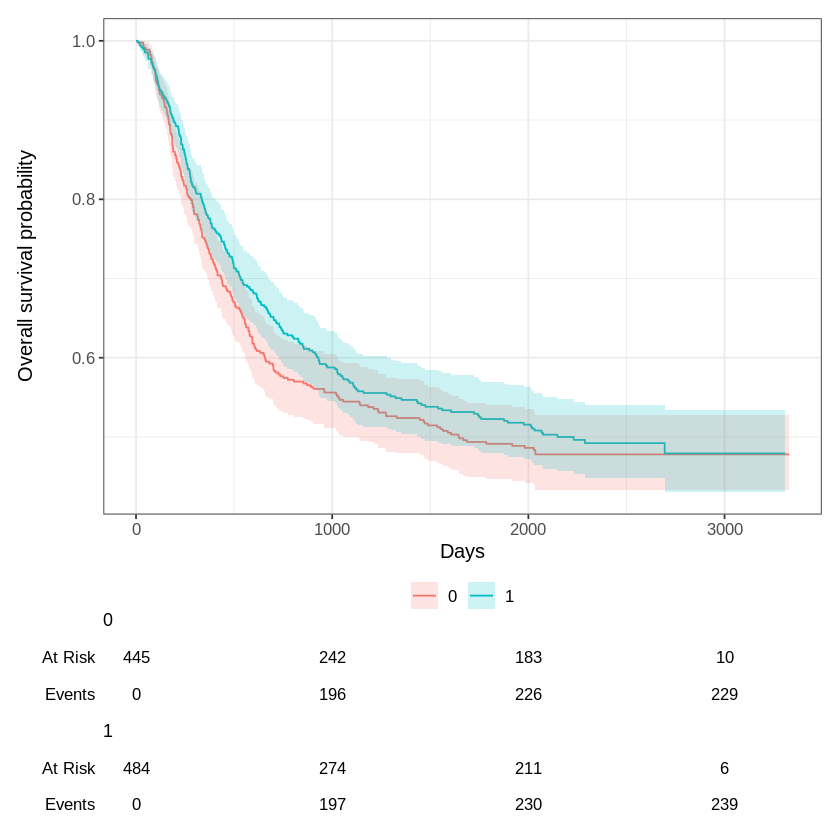

In [ ]:


# нет различий по полу у кого возникает опухоль

survfit2(Surv(time, status) ~ sex, data = colon_type_1) %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +

  add_risktable()


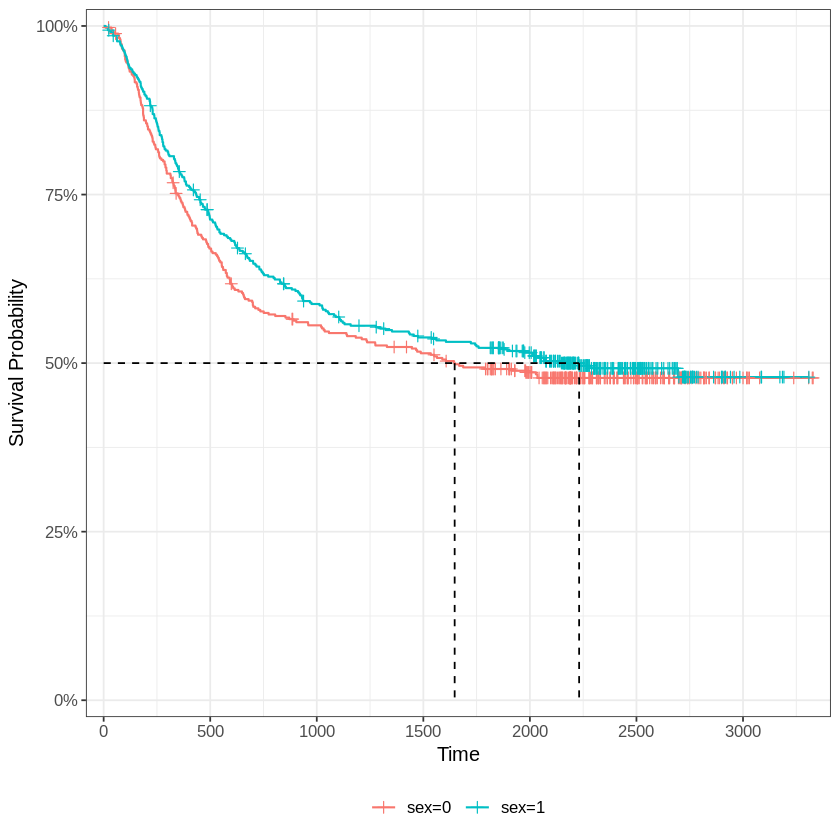

In [ ]:
survfit(Surv(time, status) ~ sex, data = colon_type_1) |>
  ggsurvfit(linewidth = 0.6) +
  add_censor_mark() +
  add_quantile(y_value = 0.5) +
  scale_ggsurvfit()



# посмотрим на анализ возникновения рецидива опухоли в зависимости от пола(0 = female, 1 = male)
# если посмотреть на медианы, то видно, что у женщин рецидив - возникал раньше, чем у мужчин

In [ ]:
s2 <- survfit(Surv(time, status) ~ sex, data = colon_type_2)
str(s2)

List of 18
 $ n        : int [1:2] 445 484
 $ time     : num [1:846] 23 52 56 79 93 113 122 127 141 186 ...
 $ n.risk   : num [1:846] 445 444 443 442 441 440 439 438 437 436 ...
 $ n.event  : num [1:846] 1 1 1 1 1 1 1 1 1 1 ...
 $ n.censor : num [1:846] 0 0 0 0 0 0 0 0 0 0 ...
 $ surv     : num [1:846] 0.998 0.996 0.993 0.991 0.989 ...
 $ std.err  : num [1:846] 0.00225 0.00319 0.00391 0.00451 0.00505 ...
 $ cumhaz   : num [1:846] 0.00225 0.0045 0.00676 0.00902 0.01129 ...
 $ std.chaz : num [1:846] 0.00225 0.00318 0.0039 0.00451 0.00505 ...
 $ strata   : Named int [1:2] 415 431
  ..- attr(*, "names")= chr [1:2] "sex=0" "sex=1"
 $ type     : chr "right"
 $ logse    : logi TRUE
 $ conf.int : num 0.95
 $ conf.type: chr "log"
 $ lower    : num [1:846] 0.993 0.989 0.986 0.982 0.979 ...
 $ upper    : num [1:846] 1 1 1 1 0.999 ...
 $ t0       : num 0
 $ call     : language survfit(formula = Surv(time, status) ~ sex, data = colon_type_2)
 - attr(*, "class")= chr "survfit"


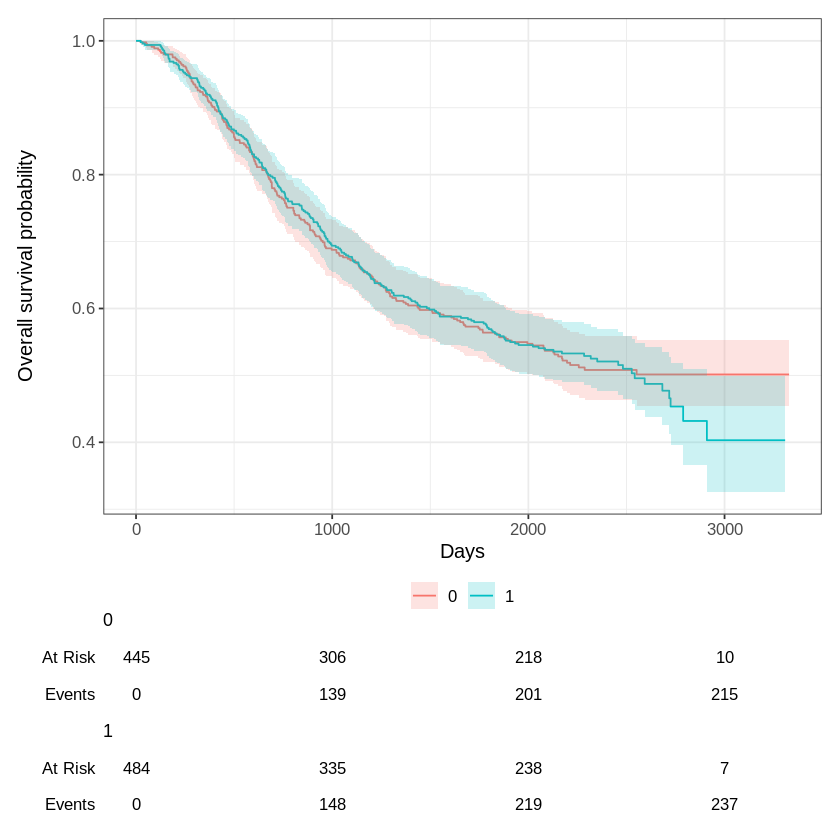

In [ ]:


  # вероятность летального исхода у женщин ниже к концу исследования

survfit2(Surv(time, status) ~ sex, data = colon_type_2) %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +
  add_risktable()


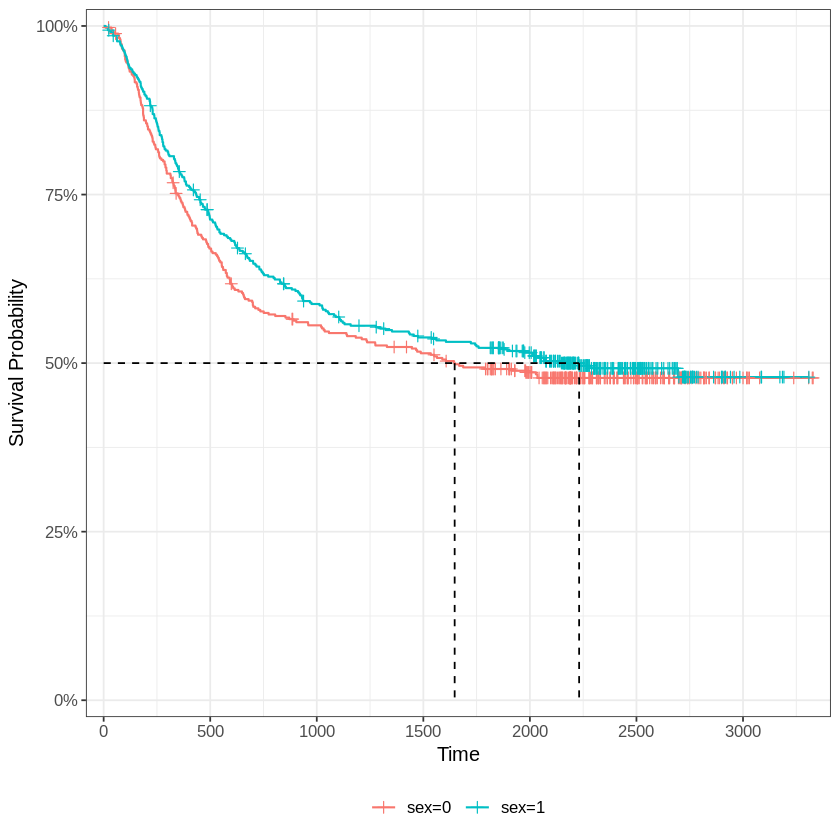

In [ ]:
survfit(Surv(time, status) ~ sex, data = colon_type_1) |>
  ggsurvfit(linewidth = 0.6) +
  add_censor_mark() +
  add_quantile(y_value = 0.5) +
  scale_ggsurvfit()



# посмотрим на анализ летального исхода в зависимости от пола(0 = female, 1 = male)
# если посмотреть на медианы, то видно, что у женщин летальный исход - возникал раньше, чем у мужчин

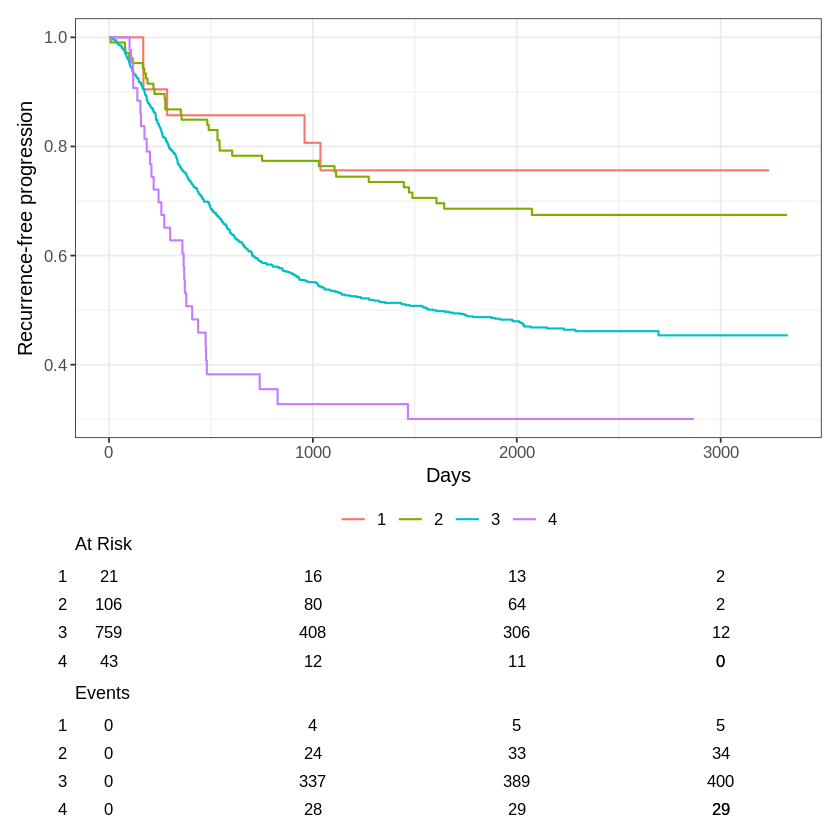

In [ ]:
#

survfit2(Surv(time, status) ~ extent, data = colon_type_1) |>
  ggsurvfit(linewidth = 0.6) +
  labs(
    x = "Days",
    y = "Recurrence-free progression"
  ) +

  add_risktable()

# посмотрим возникноение рецидива на разных стадиях заболевания

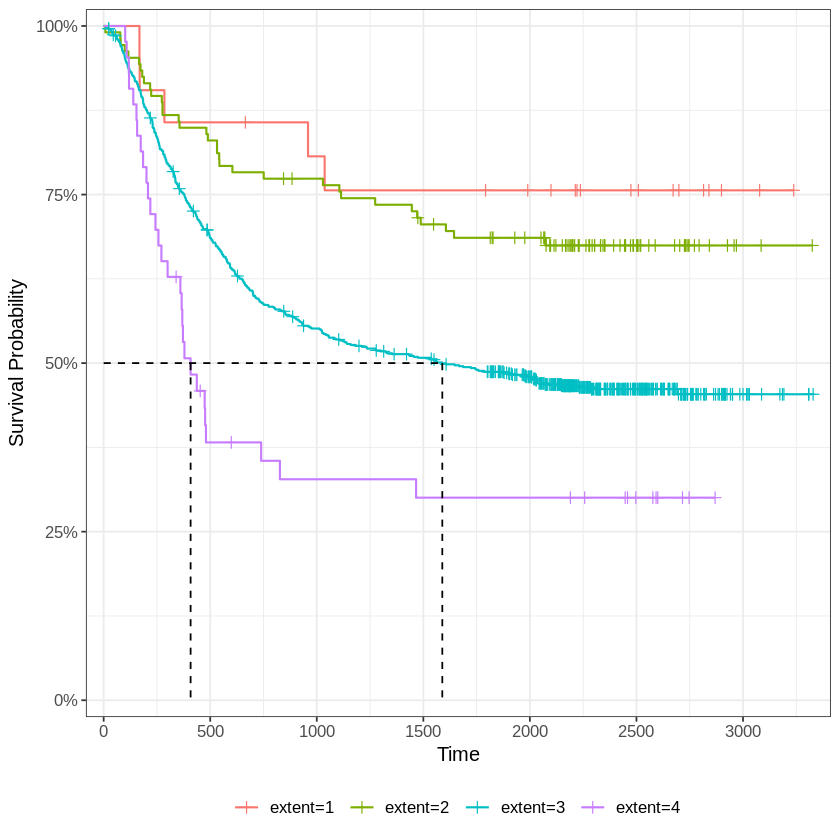

In [ ]:
survfit(Surv(time, status) ~ extent, data = colon_type_1) |>
  ggsurvfit(linewidth = 0.6) +
  add_censor_mark() +
  add_quantile(y_value = 0.5) +
  scale_ggsurvfit()



# посмотрим на анализ летального исхода в зависимости от пола(0 = female, 1 = male)
# если посмотреть на медианы, то видно, что на стадии 4 рецидив возникает раньше

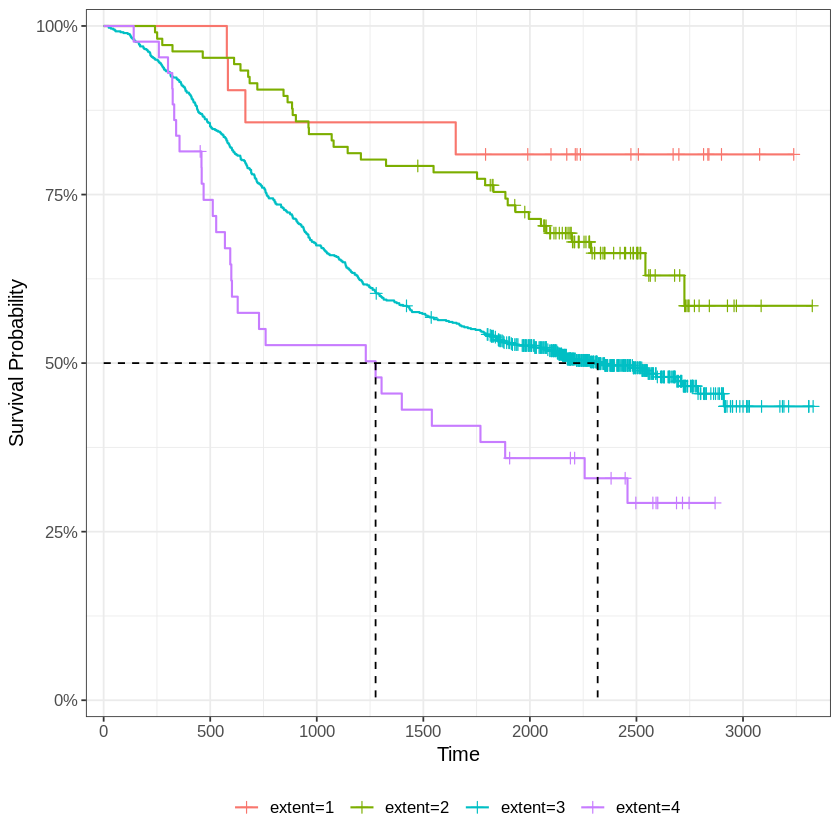

In [ ]:
survfit(Surv(time, status) ~ extent, data = colon_type_2) |>
  ggsurvfit(linewidth = 0.6) +
  add_censor_mark() +
  add_quantile(y_value = 0.5) +
  scale_ggsurvfit()



# посмотрим на анализ летального исхода в зависимости от пола(0 = female, 1 = male)
# летальный исход у пациентов с 4 стадией выше,чем у пациентов с 3


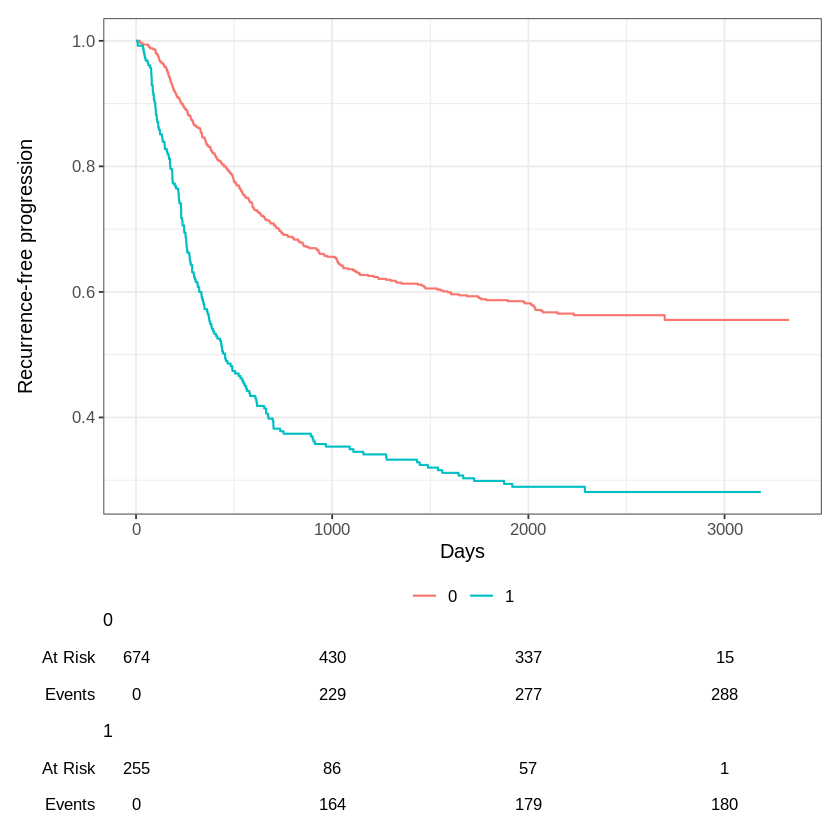

In [ ]:
#

survfit2(Surv(time, status) ~ node4, data = colon_type_1) |>
  ggsurvfit(linewidth = 0.6) +
  labs(
    x = "Days",
    y = "Recurrence-free progression"
  ) +

  add_risktable()

# посмотрим возникноение рецидива у пацентов с 4 и более ЛУ

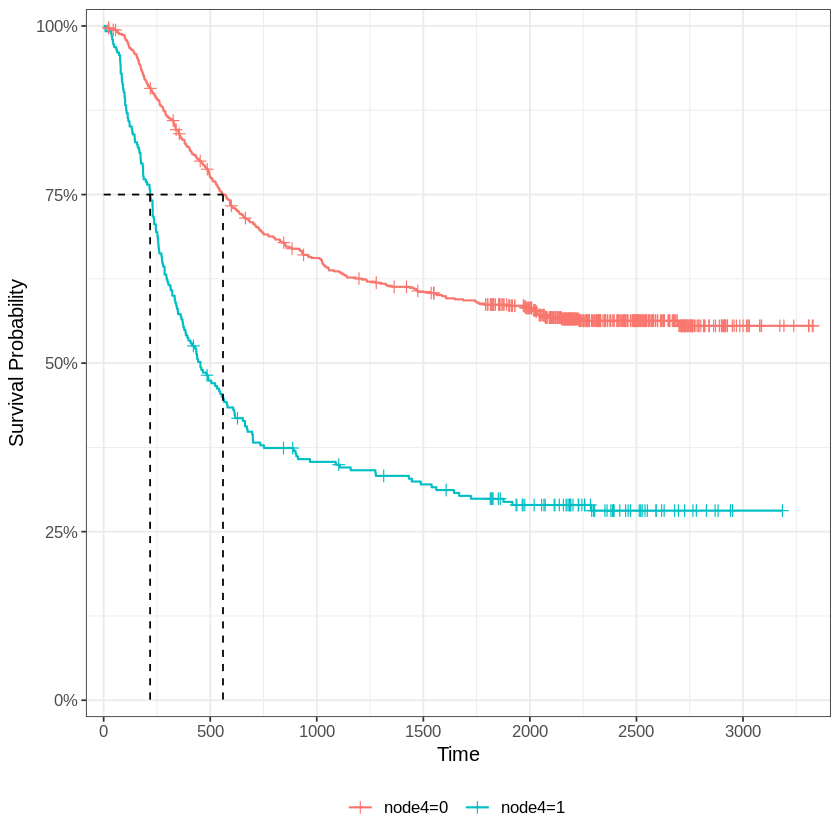

In [ ]:
survfit(Surv(time, status) ~ node4, data = colon_type_1) |>
  ggsurvfit(linewidth = 0.6) +
  add_censor_mark() +
  add_quantile(y_value = 0.75) +
  scale_ggsurvfit()



# посмотрим на анализ летального исхода в зависимости от пола(0 = female, 1 = male)
# видно, что у 75% пациенов рецидив с 4 ЛУ воникает раньше, те выживаемость у них ниже

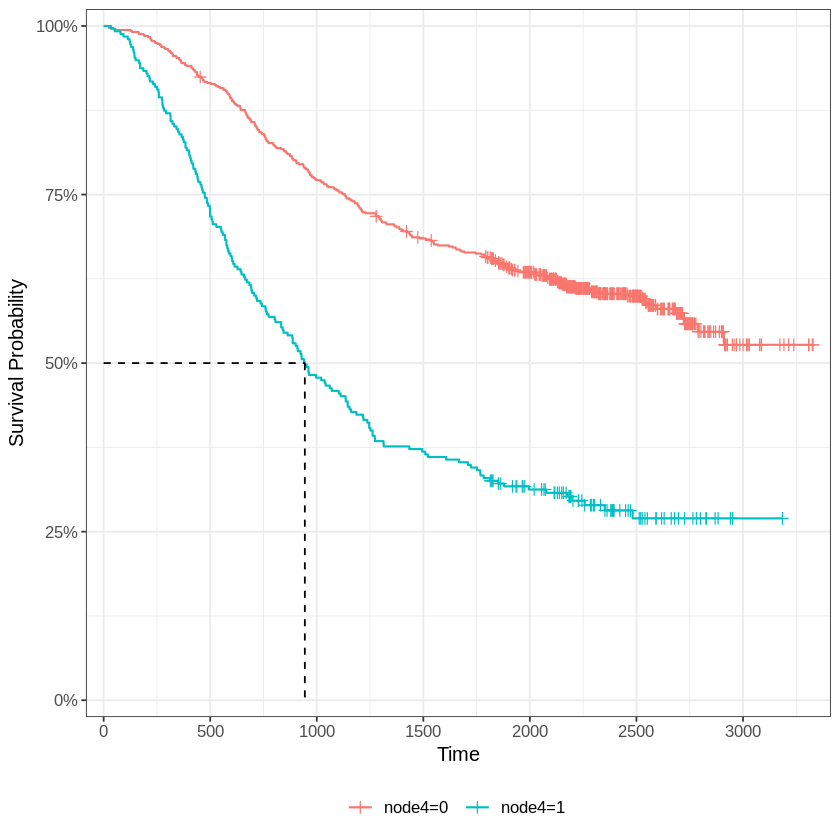

In [ ]:
survfit(Surv(time, status) ~ node4, data = colon_type_2) |>
  ggsurvfit(linewidth = 0.6) +
  add_censor_mark() +
  add_quantile(y_value = 0.5) +
  scale_ggsurvfit()



# посмотрим на анализ летального исхода в зависимости от пола(0 = female, 1 = male)
# летальность у пациентов с выше c 4 ЛУ

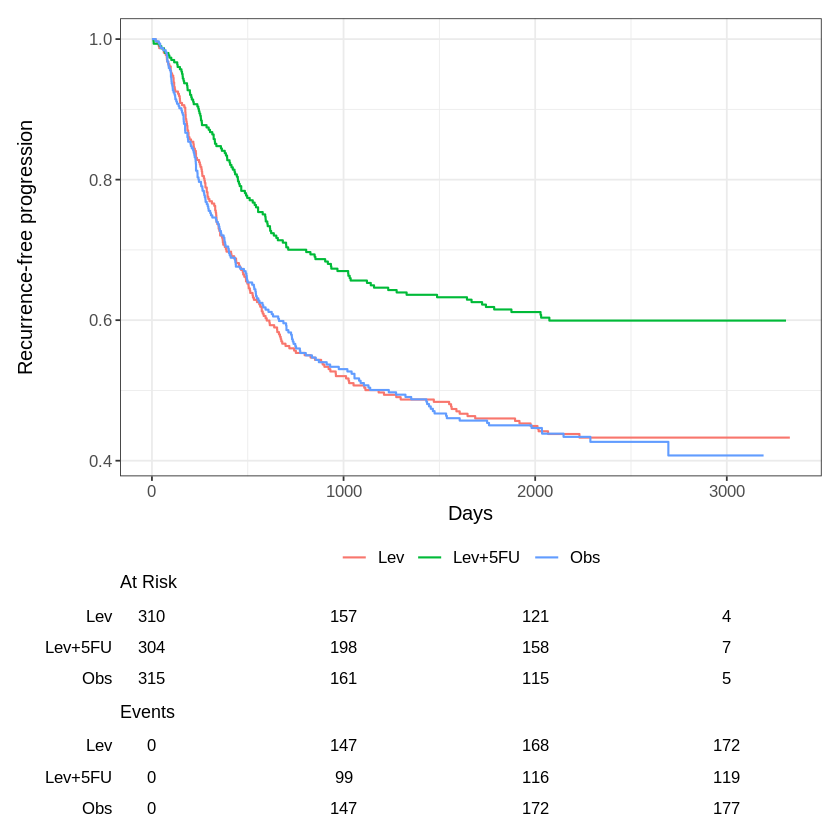

In [ ]:
#

survfit2(Surv(time, status) ~ rx, data = colon_type_1) |>
  ggsurvfit(linewidth = 0.6) +
  labs(
    x = "Days",
    y = "Recurrence-free progression"
  ) +

  add_risktable()

# посмотрим возникноение рецидива у пацентов с лечением(LEV+5FU), без и только Lev

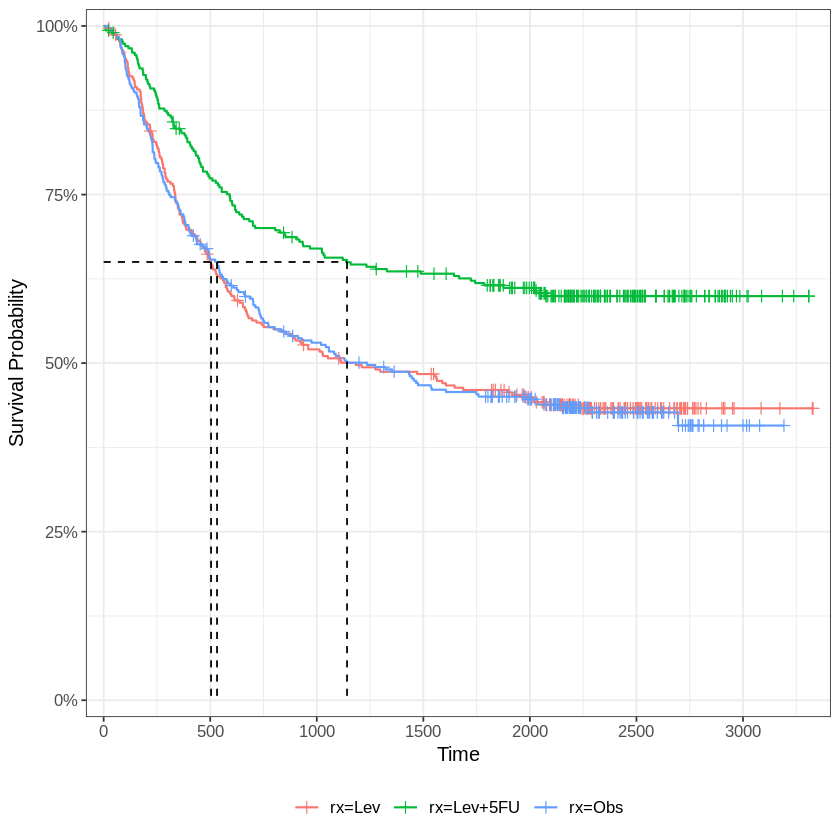

In [ ]:
survfit(Surv(time, status) ~ rx, data = colon_type_1) |>
  ggsurvfit(linewidth = 0.6) +
  add_censor_mark() +
  add_quantile(y_value = 0.65) +
  scale_ggsurvfit()



# посмотрим на анализ летального исхода в зависимости от лечения
# выживаемость у пациентов с lev+5FU выше

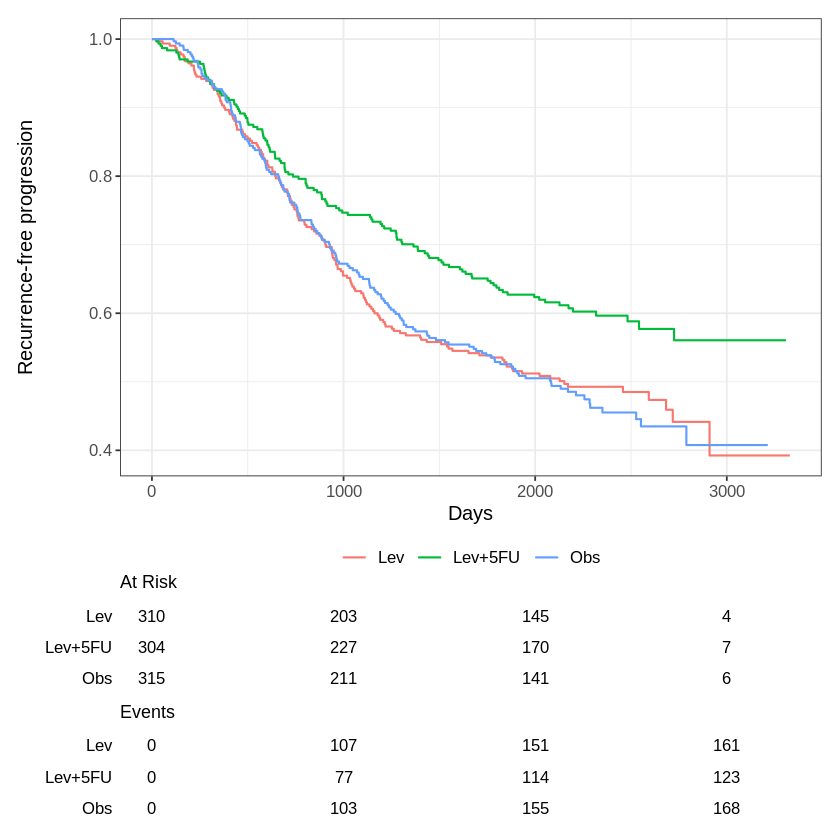

In [ ]:
survfit2(Surv(time, status) ~ rx, data = colon_type_2) |>
  ggsurvfit(linewidth = 0.6) +
  labs(
    x = "Days",
    y = "Recurrence-free progression"
  ) +

  add_risktable()

# посмотрим возникноение летального исхода у пацентов с различным типом лечения

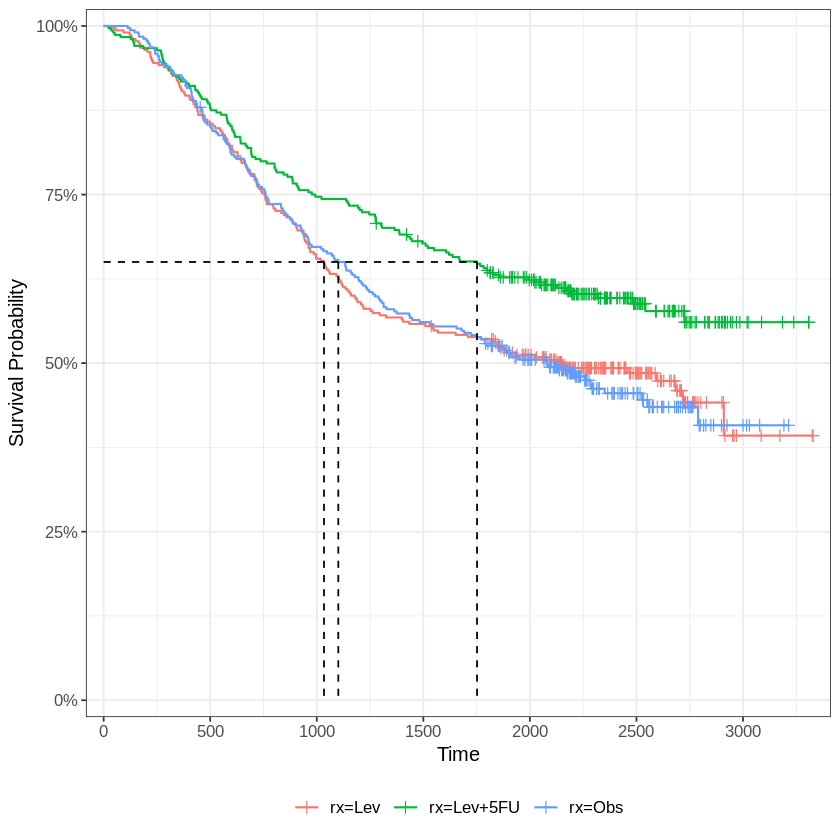

In [ ]:
survfit(Surv(time, status) ~ rx, data = colon_type_2) |>
  ggsurvfit(linewidth = 0.6) +
  add_censor_mark() +
  add_quantile(y_value = 0.65)
  +
  scale_ggsurvfit()



# посмотрим на анализ летального исхода в зависимости от пола
# выживаемость у пациентов с lev+5FU выше, летальность наступает позже

In [ ]:
summary(s1, times = 365.28)

Call: survfit(formula = Surv(time, status) ~ sex, data = colon_type_1)

                sex=0 
        time       n.risk      n.event     survival      std.err lower 95% CI 
    365.2800     325.0000     116.0000       0.7380       0.0209       0.6982 
upper 95% CI 
      0.7802 

                sex=1 
        time       n.risk      n.event     survival      std.err lower 95% CI 
    365.2800     374.0000     106.0000       0.7799       0.0189       0.7437 
upper 95% CI 
      0.8178 


In [ ]:
summary(s1, times = 365.28 * 3)

Call: survfit(formula = Surv(time, status) ~ sex, data = colon_type_1)

                sex=0 
        time       n.risk      n.event     survival      std.err lower 95% CI 
    1.10e+03     2.37e+02     2.01e+02     5.45e-01     2.37e-02     5.00e-01 
upper 95% CI 
    5.93e-01 

                sex=1 
        time       n.risk      n.event     survival      std.err lower 95% CI 
    1.10e+03     2.65e+02     2.06e+02     5.68e-01     2.27e-02     5.26e-01 
upper 95% CI 
    6.15e-01 


In [ ]:
summary(s1, times = 365.28 * 7)

Call: survfit(formula = Surv(time, status) ~ sex, data = colon_type_1)

                sex=0 
        time       n.risk      n.event     survival      std.err lower 95% CI 
    2.56e+03     6.60e+01     2.29e+02     4.78e-01     2.39e-02     4.33e-01 
upper 95% CI 
    5.27e-01 

                sex=1 
        time       n.risk      n.event     survival      std.err lower 95% CI 
    2.56e+03     5.60e+01     2.38e+02     4.92e-01     2.35e-02     4.48e-01 
upper 95% CI 
    5.40e-01 
